## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergeddf = pd.merge(mouse_metadata_df, study_results_df)

# Display the data table for preview
mergeddf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
mergeddf['Mouse ID'].count()

1893

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicatedf = mergeddf[mergeddf.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

duplicatedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop any duplicate rows
dropdf = mergeddf.reset_index().drop_duplicates(subset=['Mouse ID','Timepoint'],
                                       keep='first').set_index('index')

dropdf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,,,,,
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice

dropdf['Mouse ID'].count()

1888

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
tumor = dropdf.groupby("Drug Regimen")
tumordf = tumor.count()

tumordf

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [66]:
#mean
mean = dropdf.groupby("Drug Regimen")
mean.df = tumor.mean()

tvmean = mean.df["Tumor Volume (mm3)"]
tumordf["Mean"] = tvmean

In [8]:
#median
med = dropdf.groupby("Drug Regimen")
med.df = tumor.median()

tvmed = med.df["Tumor Volume (mm3)"]
tumordf["Median"] = tvmed

In [9]:
#variance
var = dropdf.groupby("Drug Regimen")
var.df = tumor.var()

tvvar = med.df["Tumor Volume (mm3)"]
tumordf["Variance"] = tvvar

In [10]:
#standard dev
std = dropdf.groupby("Drug Regimen")
std.df = tumor.std()

tvstd = std.df["Tumor Volume (mm3)"]
tumordf["St Dev"] = tvstd

In [11]:
#SEM
sem = dropdf.groupby("Drug Regimen")
sem.df = tumor.sem()

tvsem = med.df["Tumor Volume (mm3)"]
tumordf["SEM"] = tvsem

In [12]:
#summary

sumstats = tumordf[['Mean', 'Median', 'Variance', 'St Dev', 'SEM',]]

sumstats

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,41.557809,4.994774,41.557809
Ceftamin,52.591172,51.776157,51.776157,6.268188,51.776157
Infubinol,52.884795,51.820584,51.820584,6.567243,51.820584
Ketapril,55.235638,53.698743,53.698743,8.279709,53.698743
Naftisol,54.331565,52.509285,52.509285,8.134708,52.509285
Placebo,54.033581,52.288934,52.288934,7.821003,52.288934
Propriva,52.393463,50.909965,50.909965,6.568014,50.909965
Ramicane,40.216745,40.673236,40.673236,4.846308,40.673236
Stelasyn,54.233149,52.431737,52.431737,7.710419,52.431737


## Bar and Pie Charts

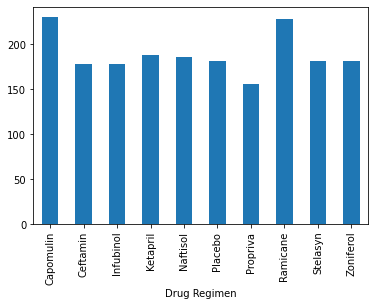

In [56]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
tumordf['Tumor Volume (mm3)'].plot(kind="bar")

Text(0, 0.5, 'Tumor Volume')

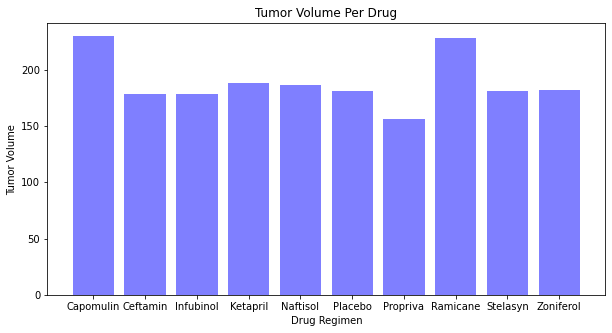

In [57]:
# Generate identical bar plot using pyplot instead of pandas.
x_axis = np.arange(len(tumordf))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, tumordf["Tumor Volume (mm3)"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane","Stelasyn","Zoniferol"])
plt.title("Tumor Volume Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")

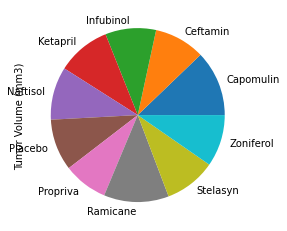

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
tumordf['Tumor Volume (mm3)'].plot(kind="pie")


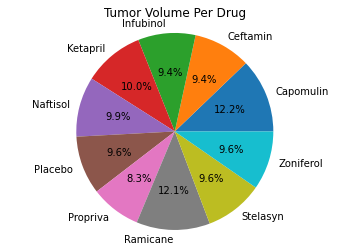

In [64]:
# Generate identical pie plot using pyplot
my_data = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
my_labels = "Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane","Stelasyn","Zoniferol"
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Tumor Volume Per Drug')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

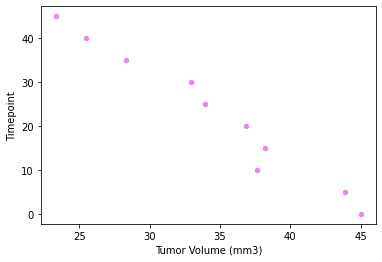

In [97]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
capdf = (dropdf.loc[dropdf['Mouse ID'] == 's185'])

capline = capdf.plot.scatter(x='Tumor Volume (mm3)', y='Timepoint', c='Violet')

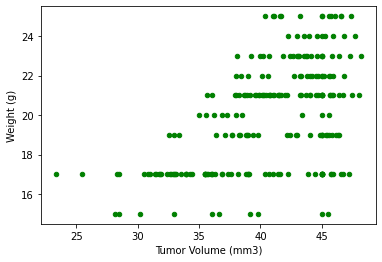

In [102]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
cap2df = (dropdf.loc[dropdf['Drug Regimen'] == 'Capomulin'])
cap2line = cap2df.plot.scatter(x='Tumor Volume (mm3)', y='Weight (g)', c='Green')

## Correlation and Regression

In [103]:
cap2df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,SEM,Total
index,,,,,,,,,,
10,s185,Capomulin,Female,3,17,0,45.000000,0,NaN,NaN
11,s185,Capomulin,Female,3,17,5,43.878496,0,NaN,NaN
12,s185,Capomulin,Female,3,17,10,37.614948,0,NaN,NaN
13,s185,Capomulin,Female,3,17,15,38.177232,0,NaN,NaN
14,s185,Capomulin,Female,3,17,20,36.866876,0,NaN,NaN


In [106]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = cap2df.iloc[:,4]
volume = cap2df.iloc[:,6]
correlation = st.pearsonr(weight, volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


# Observations and Insights